In [1]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to C:\Users\b.Yuva
[nltk_data]     Shree\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\b.Yuva
[nltk_data]     Shree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\b.Yuva
[nltk_data]     Shree\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\b.Yuva
[nltk_data]     Shree\AppData\Roaming\nltk_data...


True

In [31]:
train_data = pd.read_csv(r'C:\Users\b.Yuva Shree\Downloads\archive (17)\twitter_training.csv')
test_data = pd.read_csv(r'C:\Users\b.Yuva Shree\Downloads\archive (17)\twitter_validation.csv')

In [32]:
train_data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [33]:
test_data.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [34]:
train_data.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [35]:
test_data.columns

Index(['3364', 'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')

In [36]:
train_social_media_data = train_data['im getting on borderlands and i will murder you all ,'].tolist()  # Assuming 'Positive' is the column containing social media text

In [39]:
def preprocess_text(text):
    text = re.sub(r'http\S+', '', str(text))  # Remove URLs
    text = re.sub(r'[^\w\s]', '', str(text))  # Remove punctuation
    text = text.lower()  # Convert text to lowercase
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [token for token in tokens if token not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatize tokens
    return ' '.join(tokens)

In [40]:
preprocessed_train_data = [preprocess_text(text) for text in train_social_media_data]

In [41]:
analyzer = SentimentIntensityAnalyzer()
train_sentiment_scores = [analyzer.polarity_scores(text)['compound'] for text in preprocessed_train_data]

In [47]:
def visualize_sentiment(sentiment_scores, title):
    plt.figure(figsize=(10, 6))
    plt.hist(sentiment_scores, bins=20, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [43]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

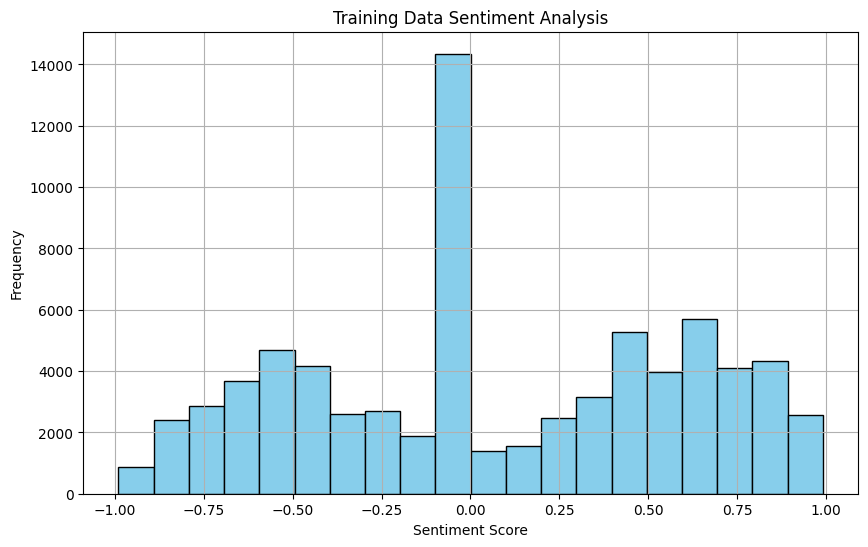

In [48]:
visualize_sentiment(train_sentiment_scores, 'Training Data Sentiment Analysis')

In [45]:
train_positive_texts = ' '.join([preprocessed_train_data[i] for i, score in enumerate(train_sentiment_scores) if score > 0])
train_negative_texts = ' '.join([preprocessed_train_data[i] for i, score in enumerate(train_sentiment_scores) if score < 0])

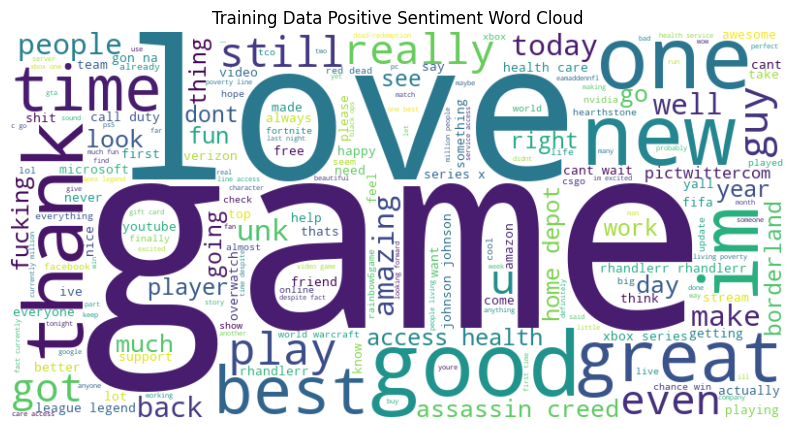

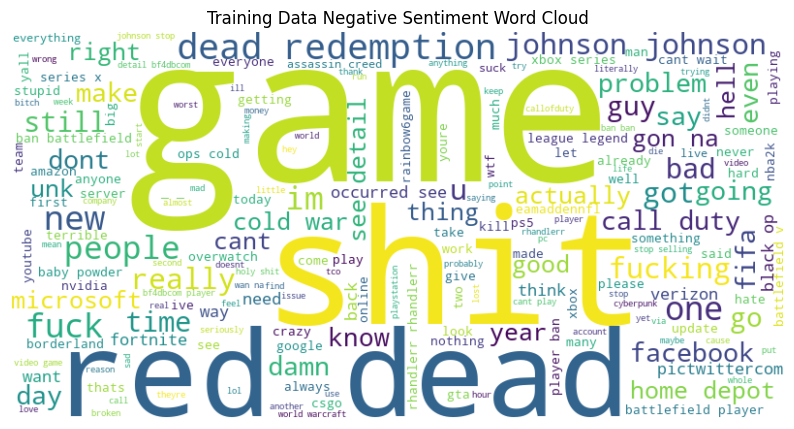

In [46]:
generate_wordcloud(train_positive_texts, 'Training Data Positive Sentiment Word Cloud')
generate_wordcloud(train_negative_texts, 'Training Data Negative Sentiment Word Cloud')